In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Question1
First, read the dataset using the pandas library and convert it into a data frame

In [2]:
students = pd.read_csv('Student.csv')
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Question2
It is predicted that the math_score of male students will be higher than that of female students. Check and show the correctness or incorrectness of this prediction by drawing the histogram of the math_score field for each group and calculating the average, minimum and maximum math scores of each group.

gender
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: math score, dtype: object

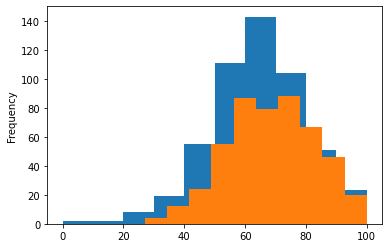

In [4]:
students.groupby('gender')["math score"].plot(kind="hist")

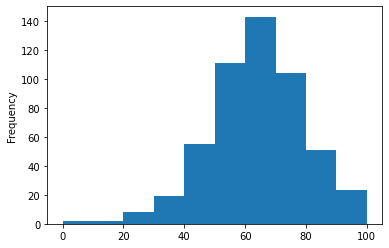

In [5]:
female_students = students['gender'] == "female"
students[female_students]["math score"].plot(kind="hist")

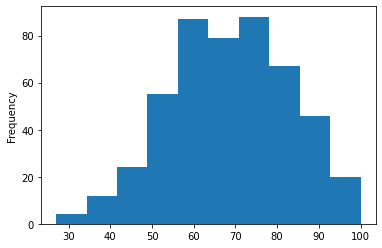

In [6]:
male_students = students['gender'] == "male"
students[male_students]["math score"].plot(kind="hist")

In [7]:
students.groupby('gender')["math score"].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


### compare male,female math scores
1. mean: male is 68 which is greater than female with 63
2. min: male is 27 which is greater than female with 0
3. max: male and female max score is equal and 100
4. so the prediction was true and male scores were better!

### Question3
Show the frequency of race/ethnicity values using a pie chart

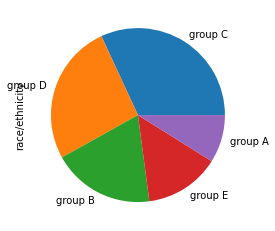

In [8]:
students["race/ethnicity"].value_counts().plot(kind="pie")

### Question4
Create a new field named total_grade and store the average reading_score, writing_score and math_score of each student in it.

In [9]:
students[['writing score', 'reading score','math score']]

,writing score,reading score,math score
0,74,72,72
1,88,90,69
2,93,95,90
3,44,57,47
4,75,78,76
...,...,...,...
995,95,99,88
996,55,55,62
997,65,71,59
998,77,78,68


In [15]:
students[['writing score', 'reading score','math score']].mean(axis=1)
#it calculates avg or mean of these three values per each row

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Length: 1000, dtype: float64

In [11]:
students["total_grade"] = students[['writing score', 'reading score','math score']].mean(axis=1)

In [12]:
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [13]:
students["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

### Question5
contingency table of two variables "parental level of education" , "gender"
#### A contingency table is
a type of table that summarizes the relationship between two categorical variables.

In [14]:
pd.crosstab(students['gender'],students['parental level of education'], margins = False)

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
gender,,,,,,
female,116,63,94,36,118,91
male,106,55,102,23,108,88
